In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [4]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
penguins.shape

(344, 7)

In [6]:
#Clean data,drop the values with species chistrap & dropnulls
penguins_a = penguins.drop(penguins[penguins['species'] == "Chinstrap"].index)
penguins_final = penguins_a.dropna(axis= 0, how='any')

In [7]:
penguins_final.shape

(265, 7)

In [8]:
penguins_final.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


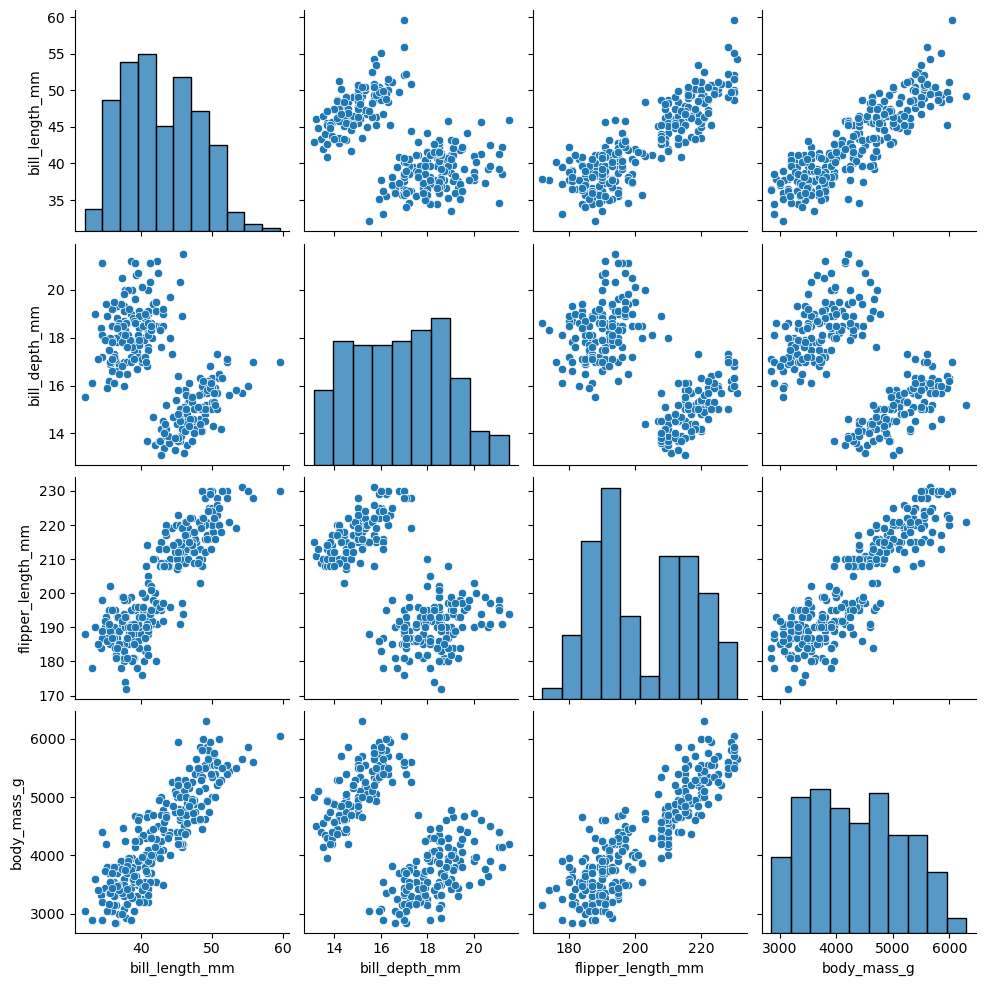

In [9]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

In [10]:
ols1_data = penguins_final

In [11]:
ols1_formula = "body_mass_g ~ bill_length_mm"
#x variable = bill_length_m (comes after ~)
#y variable = body mass g

In [12]:
#Import OLS function
from statsmodels.formula.api import ols

In [13]:
OLS = ols(formula = ols1_formula, data = ols1_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.33e-85
Time:                        10:58:13   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Subset X Variable
x = ols1_data["bill_length_mm"]

#Get Predictions from model
fitted_values = model.predict(x)
#calculate_residuals
residuals = model.resid

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

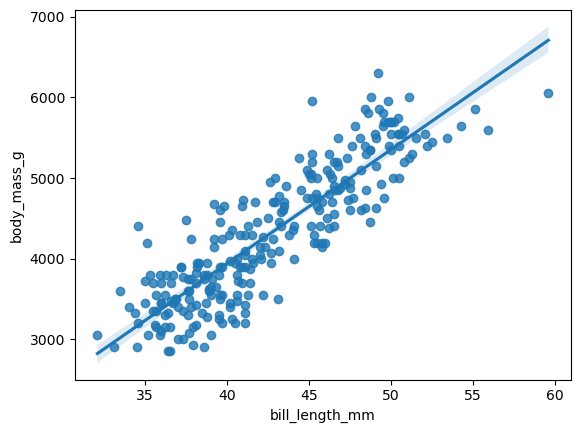

In [15]:
sns.regplot(x = "bill_length_mm", y="body_mass_g", data = ols1_data)

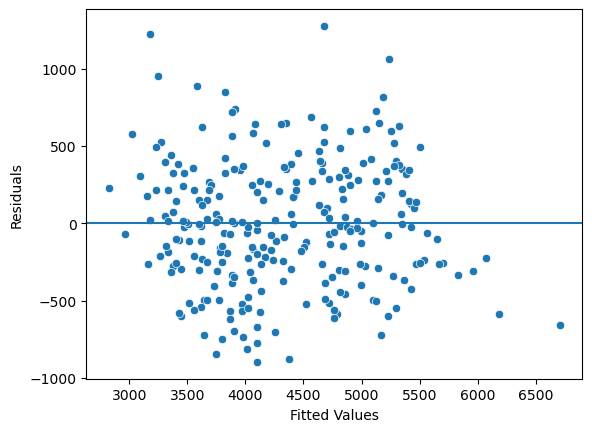

In [16]:
import matplotlib.pyplot as plt

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show() 
#shows homoesdacity

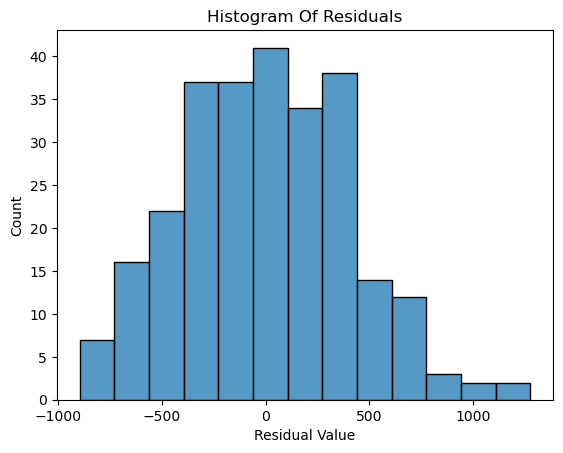

In [17]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram Of Residuals")
plt.show()
#check normality using histplot or qqplot

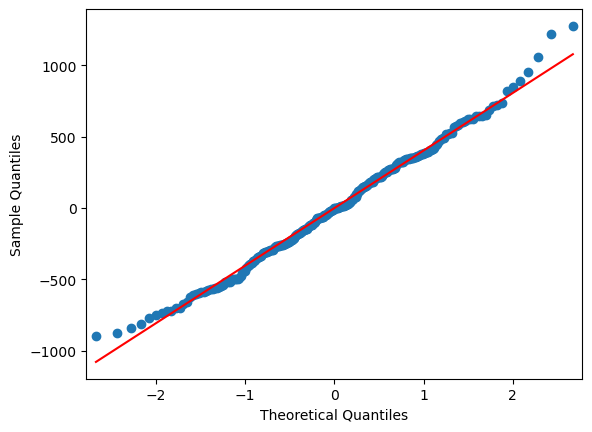

In [18]:
#confirms normality
import statsmodels.api  as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

MODEL WITH CHINSTRAP DATA

In [19]:
#Chistrap Subset
chinstrap_penguins = penguins[penguins["species"]== "Chinstrap"]

#Reset Index
chinstrap_penguins.reset_index(inplace = True, drop = True)

In [20]:
ols_data = chinstrap_penguins[["bill_length_mm", "flipper_length_mm"]]

In [21]:
#Write formula
ols_formula = "flipper_length_mm ~ bill_length_mm"

In [22]:
#Import OLS function
from statsmodels.formula.api import ols

In [23]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     18.88
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           4.92e-05
Time:                        10:58:15   Log-Likelihood:                -221.02
No. Observations:                  68   AIC:                             446.0
Df Residuals:                      66   BIC:                             450.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        146.6358     11.347     12.923      0.000     123.981     169.291
bill_length_mm     1.0072      0.232      4.345      0.000       0.544       1.470
==============================================================================
Omnibus:                       12.053   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               23.973
Skew:                          -0.495   Prob(JB):                     6.23e-06
Kurtosis:                       5.735   Cond. No.                         723.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

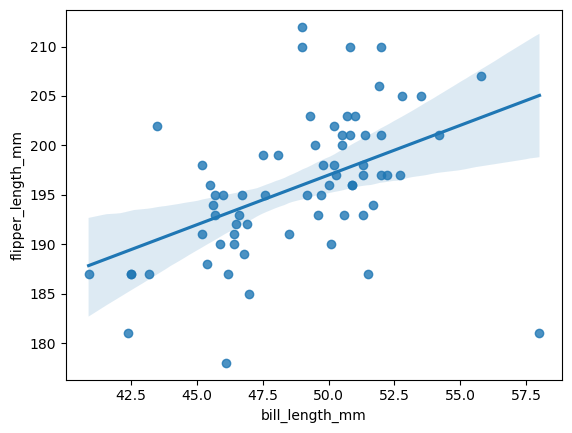

In [24]:
sns.regplot(x = "bill_length_mm", y = "flipper_length_mm", data = ols_data)

In [32]:
#Subset X Variable
x = ols_data["bill_length_mm"]

#Get Predictions from model
predicted_values = model.predict(x)
#calculate_residuals
residual_s = model.resid

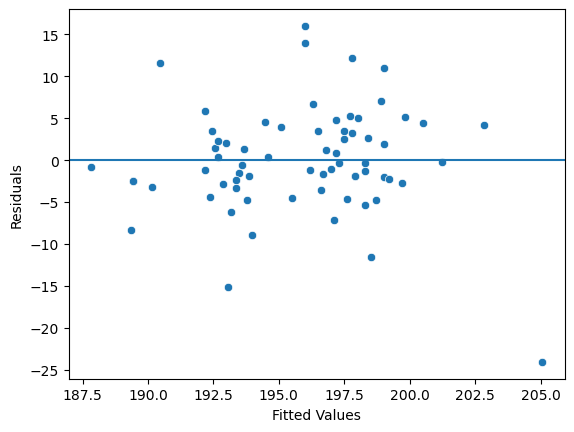

In [33]:
import matplotlib.pyplot as plt

fig = sns.scatterplot(x=predicted_values, y=residual_s)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show() 
#shows homoesdacity

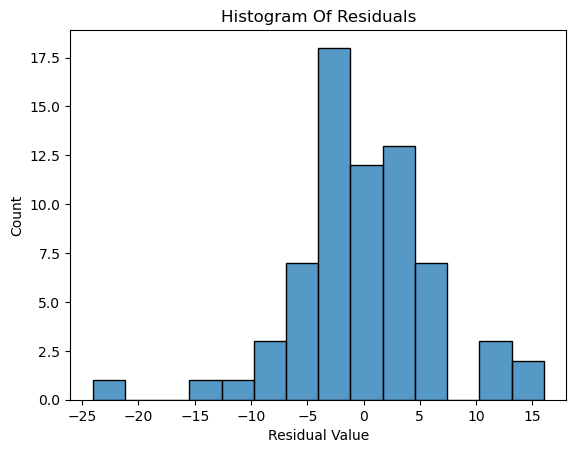

In [34]:
fig = sns.histplot(residual_s)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram Of Residuals")
plt.show()
#check normality using histplot or qqplot

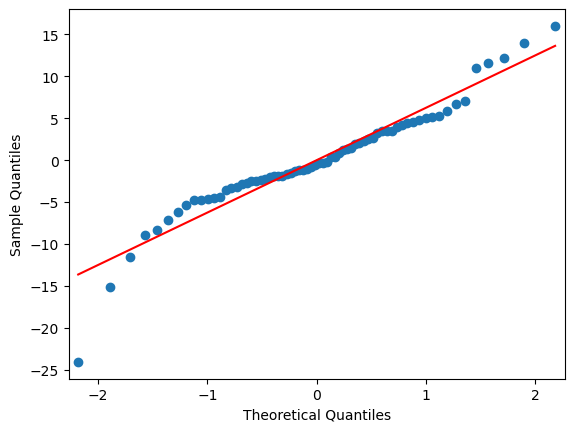

In [35]:
#confirms normality
import statsmodels.api  as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()